In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab06.ok')

Assignment: lab06
OK, version v1.13.11



# Lab 6#

In this lab, you will be working with the diamond dataset from Lecture 15. You will fit a linear model to predict the price of a diamond using its characteristics. You will get experience with extracting and creating features  using techniques such as one-hot encoding or log transformation to improve the accuracy of your model. At the end, you will get a chance to create your own features for the linear model! 

**This assignment should be completed and submitted by 11:59 PM on Monday March 30, 2020.**

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** in the following cell:


*List collaborators here*

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn

## Preliminary

First, we load the diamond dataset from Lecture 15 and look at the fields in this dataset.

In [3]:
data = pd.read_csv("data/diamonds.csv.zip", index_col=0)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Each record in the dataset corresponds to a single diamond.  The fields are

1. **carat**: The weight of the diamonds.
2. **cut**: The quality of the cut. This is an *ordinal* variable which takes on a value in the set: {`Fair`, `Good`, `Very Good`, `Premium`, and `Ideal`}.
3. **color**: The color of the diamond. This is an *ordinal* variable which takes on a value from the set of characters between `J` (worst) and `D` (best).
4. **clarity**: How obvious inclusions are within the diamond. This is an *ordinal* variable that takes on a value from the set: {`I1` (worst), `SI2`, `SI1`, `VS2`, `VS1`, `VVS2`, `VVS1`, `IF` (best)}.
5. **depth**: The height of a diamond, measured from the culet to the table, divided by its average girdle diameter.
6. **table**: The width of the diamond's table expressed as a percentage of its average diameter.
7. **price**: Price of the diamond in USD.
8. **x**: Length of the diamond measured in mm.
9. **y**: Width of the diamond measured in mm.
10. **z**: Depth of the diamond measured in mm.

We are interested in **predicting the price of a diamond given it's characteristics**.  Mathematically, we would like to fit a linear model with parameters $\theta$ corresponding to features $\textbf{x}$ to best capture the price of the diamonds:

$$
f_{\theta} (\textbf{x}) \rightarrow \text{Price}.
$$


**Note that in this lab, we will look at how incorporating different sets of features affect the loss on the entire dataset. However, as you will see in the next few lectures, this is by no means the best way to evaluate different sets of features. In future lectures, we will introduce the concept of training set, test set, validation set, and cross-validation to help us rigorously and correctly evaluate how good a set of features is for the model.**

## Part 1

For the first part of the lab, we will be focusing on diamond's **carat**, **depth**, and **table** characteristics. Hence $\textbf{x} = [$ **carat**, **depth**, **table** $]$ for a given diamond.

We are interested in using a linear model with a bias term as our model. We could express the model mathematically as:

$$
f_\theta(\textbf{x}) = f_\theta\left(\textbf{carat}, \textbf{depth}, \textbf{table}\right)
=
\theta_0 + 
\theta_1 * \textbf{carat} +
\theta_2 * \textbf{depth} +
\theta_3 * \textbf{table}.
$$

### Question 1a
Set the variable `data1` to be a subset of the original dataframe `data` such that `data1` only contains the columns `carat`, `depth`, `table` and `price`. (Note that the order of the columns in dataframe `data1` should follow the order `carat`, `depth`, `table`, `price` in order to pass the autograder test.)

<!--
BEGIN QUESTION
name: q1a
-->

In [4]:
data1 = data[["carat", "depth", "table","price"]]
data1 

,carat,depth,table,price
1,0.23,61.5,55.0,326
2,0.21,59.8,61.0,326
3,0.23,56.9,65.0,327
4,0.29,62.4,58.0,334
5,0.31,63.3,58.0,335
...,...,...,...,...
53936,0.72,60.8,57.0,2757
53937,0.72,63.1,55.0,2757
53938,0.70,62.8,60.0,2757
53939,0.86,61.0,58.0,2757


In [5]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



In the following code, we split `data1` into two variables:

(1) Target values `y`: this consists of the prices of the diamonds.

(2) Set of features `X_features`: this is a data frame where each row is a feacture vector consisting of features $[$ **carat**, **depth**, **table** $]$ (without the bias term).

In [6]:
Y = data1['price']
X_features = data1[['carat', 'depth', 'table']]

### Question 1b 
We defined a function `add_bias` which takes in a dataframe and adds a column of 1's to the left of the input dataframe. This function should modify the input dataframe in place. Please fill in this function with your solution. **Please name this extra column 'ones' in the dataframe.** After calling the function on `X_features` you will get a dataframe whose first five rows of `X_features` will look like the following:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>ones</th>
      <th>carat</th>
      <th>depth</th>
      <th>table</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1.0</td>
      <td>0.23</td>
      <td>61.5</td>
      <td>55.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1.0</td>
      <td>0.21</td>
      <td>59.8</td>
      <td>61.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1.0</td>
      <td>0.23</td>
      <td>56.9</td>
      <td>65.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1.0</td>
      <td>0.29</td>
      <td>62.4</td>
      <td>58.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1.0</td>
      <td>0.31</td>
      <td>63.3</td>
      <td>58.0</td>
    </tr>
  </tbody>
</table>

**Hint: You might find `pd.insert` method to be useful.**

<!--
BEGIN QUESTION
name: q1b
-->

In [7]:
def add_bias(data):
    data.insert( 0,"ones", np.ones(data.shape[0]))
    
X = X_features.copy() 
add_bias(X)
X.head()

,ones,carat,depth,table
1,1.0,0.23,61.5,55.0
2,1.0,0.21,59.8,61.0
3,1.0,0.23,56.9,65.0
4,1.0,0.29,62.4,58.0
5,1.0,0.31,63.3,58.0


In [8]:
ok.grade("q1b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Question 1c ###
We need a loss function to evaluate how good our model approximates the prices of the diamonds. In the cell below, complete the function `avg_squared_loss` which returns the average squared loss between true target values `y` and our predictions `y_hat`. Note that both inputs, `y` and `y_hat`, to the function are arrays. You can assume that they have the same length. 

Recall that the average squared loss is defined as:
$$
Avg\ Squared\ Loss(y, \hat{y}) = \frac{1}{n} \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2
$$

<!--
BEGIN QUESTION
name: q1c
-->

In [9]:
def avg_squared_loss(y, y_hat):
    return np.mean((y - y_hat)**2)

In [10]:
ok.grade("q1c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Now we are ready to build our linear model. In lecture, we saw that the **predictions** for the entire data set, $\hat{\mathbb{Y}}$, with a linear model can be computed as:

$$
\hat{\mathbb{Y}} = \mathbb{X} \theta  
$$

The **covariate matrix** $\mathbb{X} \in \mathbb{R}^{n \times (d+1)}$ consists of $n$ rows where each row corresponds to a record in the dataset and the $d+1$ columns correspond to the $d$ features extracted from the data plus an additional bias term.

The following function `linear_model` computes the prediction $\hat{\mathbb{Y}}$ given parameters $\theta$ and covariate matrix $\mathbb{X}$.

In [11]:
def linear_model(theta, X): 
    return X @ theta # The @ symbol is matrix multiply

Here the `@` symbol is the matrix multiply operation and is equivalent to writing `X.dot(theta)`.

### Question 1d
In the cell below, choose any `theta` you would like (please note that the dimension of the `theta` you choose should match the number of columns of the covariate matrix) and make predictions for `Y` using the linear model defined above given the `theta` you chose. Assign the variable `Y_hat` with the predictions and the variable `loss` with the average squared loss of your predictions based on the `theta` you chose.

<!--
BEGIN QUESTION
name: q1d
-->

In [12]:
theta = np.array([0,1,3,4])
Y_hat = linear_model(theta,X)
loss = avg_squared_loss(Y,Y_hat)

In [13]:
ok.grade("q1d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



You might notice the loss of the predictions for an arbitrary choice of `theta` is quite big. Recall from lecture, we can find the optimal `theta` by minimizing the mean square loss:

\begin{align}
L(\theta) &= \frac{1}{n}\sum_{i=1}^n \left( \mathbb{Y}_i - \left(\mathbb{X} \theta\right)_i \right)^2 \\
&= \frac{1}{n}\sum_{i=1}^n \left( \mathbb{Y}_i - \mathbb{X}_i \theta \right)^2 \\
&= \frac{1}{n} || \mathbb{Y} - \mathbb{X} \theta ||_2^2 \\
&= \frac{1}{n}\left( \mathbb{Y} - \mathbb{X}\theta \right)^T \left( \mathbb{Y} - \mathbb{X}\theta \right)
\end{align}

In the video from Lecture 15 we saw that the normal equation (which we derived from a geometric perspective) is:

$$
(\mathbb{X}^T \mathbb{X}) \hat{\theta} = \mathbb{X}^T \mathbb{Y}
$$

Solving for $\hat{\theta}$ in the above equation gives us the minimizer of the squared loss with respect to our data.  

If $\mathbb{X}^T \mathbb{X}$ is invertible (full rank), $\hat{\theta}$ can be computed analytically as:

$$
 \hat{\theta} = \left( \mathbb{X}^T \mathbb{X} \right)^{-1} \mathbb{X}^T \mathbb{Y}.
$$


We will not use the above analytic approach for solving $\hat{\theta}$ in this lab. Instead, we will use the `sklearn` library introduced in Lecture 16 to fit our model to find the optimal $\theta$.

In [14]:
# Import the LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression

### Question 1e
In the cell below, 
1. Fit a linear model using `X` and `Y` defined earlier in the lab. 
2. Make predictions `Y_hat` for `Y` using the fitted model.
3. Calculate the average squared loss of your prediction.

<!--
BEGIN QUESTION
name: q1e
-->

In [15]:
model = LinearRegression()
model.fit(X, Y)
Y_hat = model.predict(X)
loss = avg_squared_loss(Y,Y_hat)
loss

2328790.795189534

In [16]:
ok.grade("q1e");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In the cell below, we create a scatter plot by plotting (`Y`, `Y_pred`). The redline is the identity line where each point on the line has the same values for the variables representing the x-axis and y-axis. What do you observe? 

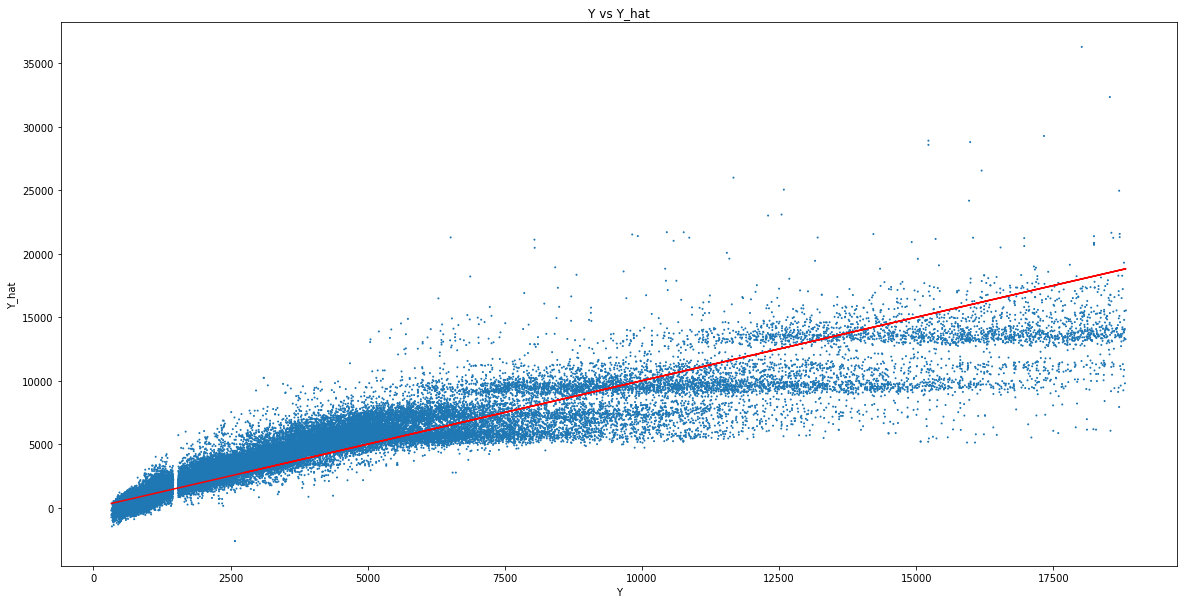

In [17]:
Y_s = [1 for _ in range(len(Y))] # setting the sizes of the markers to 1
plt.figure(figsize = (20, 10))
plt.scatter(Y, Y_hat, s = Y_s)
plt.plot(Y, Y, c = 'r') # the identity line
plt.xlabel('Y')
plt.ylabel('Y_hat')
plt.title('Y vs Y_hat')
plt.show()

## Part 2

For part 1, we only used the quantitative features `carat`, `depth`, `table`. As you can see from Question 1(e), the loss seems to be big. Is there a way to fit a better model by incorporating other features?

In this second part of the lab, we explore incorporating qualitative features into our model.

Recall our dataframe looks like the following:

In [18]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We only incorporated information about `carat`, `depth`, `table` in our previous features. Do `cut`, `color`, and `clarity` matter when it comes to predicting the prices of the diamonds?

Based on this online article https://www.pricescope.com/diamond-prices, these characteristics should matter! So let's try to incoporate these into our model!

Recall from Lecture 16, to include qualitative variables as features, we may use one-hot encoding. The idea of one-hot encoding is to vectorize the variables with 1's and 0's. For example, suppose we have a qualitative variable `smoking` and the variable can take on either 'smoker' or 'non-smoker' like what we show below:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
          <th></th>
      <th>smoking</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <th>smoker</th>
    </tr>
    <tr>
      <th>1</th>
      <th>non-smoker</th>
    </tr>
    <tr>
      <th>2</th>
      <th>smoker</th>
    </tr>
    <tr>
      <th>3</th>
      <th>non-smoker</th>
    </tr>
    <tr>
      <th>4</th>
      <th>non-smoker</th>
    </tr>
  </tbody>
</table>

After one-hot encoding, the resulting dataframe will look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
          <th></th>
      <th>smoker</th>
      <th>non-smoker</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <th>1</th>
      <th>0</th>
    </tr>
    <tr>
      <th>1</th>
      <th>0</th>
      <th>1</th>
    </tr>
    <tr>
      <th>2</th>
      <th>1</th>
      <th>0</th>
    </tr>
    <tr>
      <th>3</th>
      <th>0</th>
      <th>1</th>
    </tr>
    <tr>
      <th>4</th>
      <th>0</th>
      <th>1</th>
    </tr>
  </tbody>
</table>

For this lab, we will use the [`DictVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) method from `sklearn` package to implement one-hot encoding.

Let's first examine how the model will behave if we include the `cut` feature. In the cell below, we created a new dataframe `X_char_w_cut` which adds one more column `cut` to the features defined in Part 1.

In [19]:
X_features_with_cut = data[['carat', 'cut', 'depth', 'table']]
add_bias(X_features_with_cut)
X_features_with_cut

,ones,carat,cut,depth,table
1,1.0,0.23,Ideal,61.5,55.0
2,1.0,0.21,Premium,59.8,61.0
3,1.0,0.23,Good,56.9,65.0
4,1.0,0.29,Premium,62.4,58.0
5,1.0,0.31,Good,63.3,58.0
...,...,...,...,...,...
53936,1.0,0.72,Ideal,60.8,57.0
53937,1.0,0.72,Good,63.1,55.0
53938,1.0,0.70,Very Good,62.8,60.0
53939,1.0,0.86,Premium,61.0,58.0


### Question 2a 
In the cell below, complete the code so that `X` is the new feature matrix after one-hot encoding. Note that in this question, `X` should be a numpy array.

**Hint: You might want to consult the notebook from lecture 16.**

<!--
BEGIN QUESTION
name: q2a
-->

In [22]:
from sklearn.feature_extraction import DictVectorizer

vec_enc = DictVectorizer()
vec_enc.fit(X_features_with_cut.to_dict(orient = 'records'))
X = vec_enc.transform(X_features_with_cut.to_dict(orient = 'records')).toarray()

In [23]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2b
Now please fit a linear model using our new covariate matrix `X`. Compute the average squared loss of the predictions. Compare this loss with the loss you computed in Question 1(e) without using the `cut` feature. 

<!--
BEGIN QUESTION
name: q2b
-->

In [24]:
model1 = LinearRegression()
model1.fit(X, Y)
Y_hat1 = model1.predict(X)
loss1 = avg_squared_loss(Y,Y_hat1)
loss1

2274792.192868233

In [25]:
ok.grade("q2b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [26]:
loss1 < loss

True

In [27]:
loss1 - loss

-53998.602321300656

The loss became smaller by incorporating the `cut` feature.

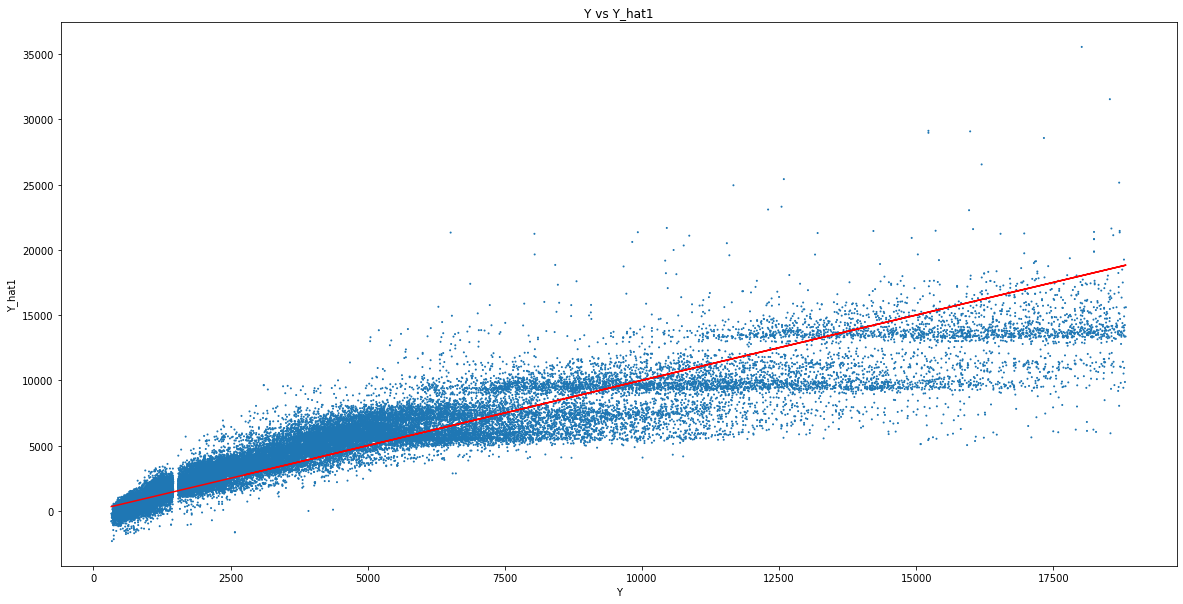

In [28]:
# Plotting the predictions
Y_s = [1 for _ in range(len(Y))] # setting the sizes of the markers to 1
plt.figure(figsize = (20, 10))
plt.scatter(Y, Y_hat1, s = Y_s) # the identity line 
plt.plot(Y, Y, c = 'r')
plt.xlabel('Y')
plt.ylabel('Y_hat1')
plt.title('Y vs Y_hat1')
plt.show()

The plot looks similar to the earlier one we have. Can we do better?

### Question 2c
In the cell below, we consider adding `color` and `clarity` as features. Please fill in the relevant code below to fit a model with the covariate matrix `X_features_with_cut_color_clarity`. 

<!--
BEGIN QUESTION
name: q2c
-->

In [29]:
X_features_with_cut_color_clarity = data[['carat', 'cut', 'color', 'clarity', 'depth', 'table']] # Do not change this line
add_bias(X_features_with_cut_color_clarity)

vec_enc = DictVectorizer()
vec_enc.fit(X_features_with_cut_color_clarity.to_dict(orient = 'records'))
X = vec_enc.transform(X_features_with_cut_color_clarity.to_dict(orient = 'records')).toarray()

model2 = LinearRegression()
model2.fit(X, Y)
Y_hat2 = model2.predict(X)
loss2 = avg_squared_loss(Y,Y_hat2)
loss2

1336023.374493578

In [30]:
ok.grade("q2c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [31]:
loss2 < loss1

True

In [32]:
loss2 - loss1

-938768.8183746552

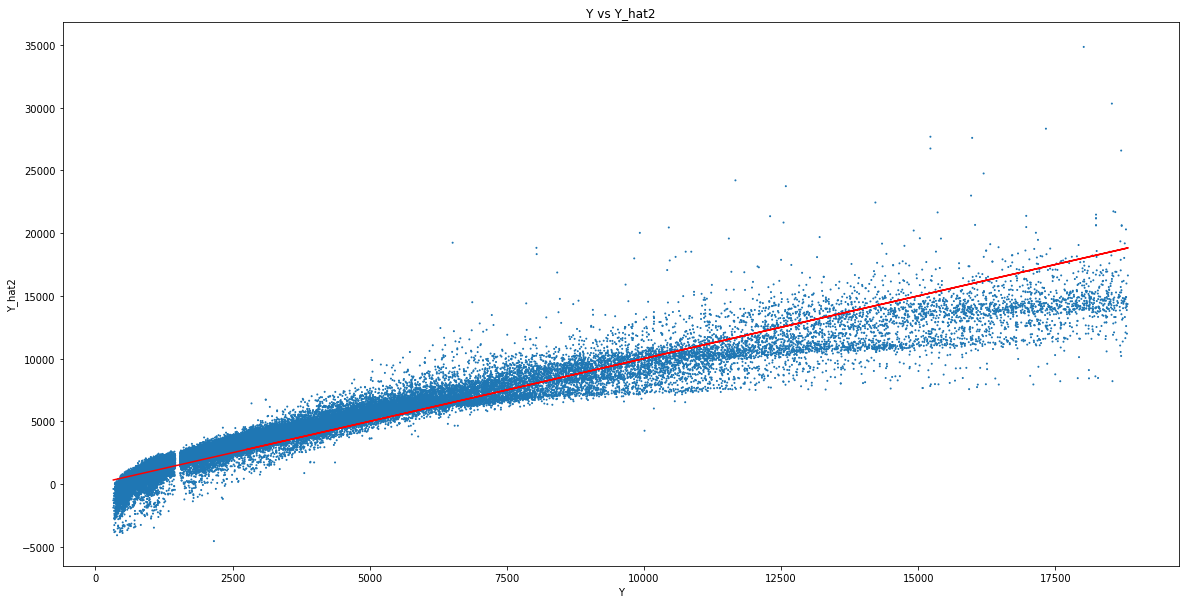

In [33]:
# Plotting the predictions
Y_s = [1 for _ in range(len(Y))] # setting the sizes of the markers to 1
plt.figure(figsize = (20, 10))
plt.scatter(Y, Y_hat2, s = Y_s) # the identity line x = y
plt.plot(Y, Y, c = 'r')
plt.xlabel('Y')
plt.ylabel('Y_hat2')
plt.title('Y vs Y_hat2')
plt.show()

We can see that by further incorporting `color` and `clarity` as features, the loss becomes smaller.

For Question 2, we see that by incorporating qualitative features using one-hot encoding, we were able to fit a linear model that makes the loss lower.

### Question 3 (Optional)
If you are interested, try coming up with more features to make the model perform even better! Some suggestions are: include a `log(carat)` feature with the logarithmic values of `carat` or the characteristics `x`, `y`, `z` in the feature set. Write your code in the cell below. 

In [34]:
### Code Start Here ####

### Congratulations! You have completed this assignment. Hope you enjoyed it!

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [ ]:
# Save your notebook first, then run this cell to submit.
ok.submit()

<IPython.core.display.Javascript object>